# Dataset Stackoverflow

## Download
Stackoverflow: 212MB, 1680 Files, 49860 Raw-Questions, 17058 duplicate, 17 invalid

Merged: 0MB, 32802 Valid-Questions,

In [14]:
%%HTML
<iframe width="100%" height="480" frameBorder="0" src="http://localhost:3002/"></iframe>

## Merge
Merged: 0MB, 32802 Valid-Questions,

# Preprocessing

## Tfidf 32, 11, (body, code, title...)
Stackoverflow: 212MB, 1680 Files, 49860 Raw-Questions, 17058 duplicate, 17 invalid

Merged: 0MB, 32802 Valid-Questions,

In [ ]:
tfdf (3x2x?), raw indices!

In [12]:
%%HTML
<iframe width="100%" height="300" frameBorder="0" src="http://localhost:3002/visualisations/weights.html"></iframe>

# Classification

## Feature selection chi2 mi

In [ ]:
tags to analyse
tags = ['python', 'php', 'html', 'android', 'javascript', 'sql']
featuresel 500 chi2, mi

In [15]:
%%HTML
<iframe width="100%" height="300" frameBorder="0" src="http://localhost:3002/"></iframe>

## Supervised algorythms

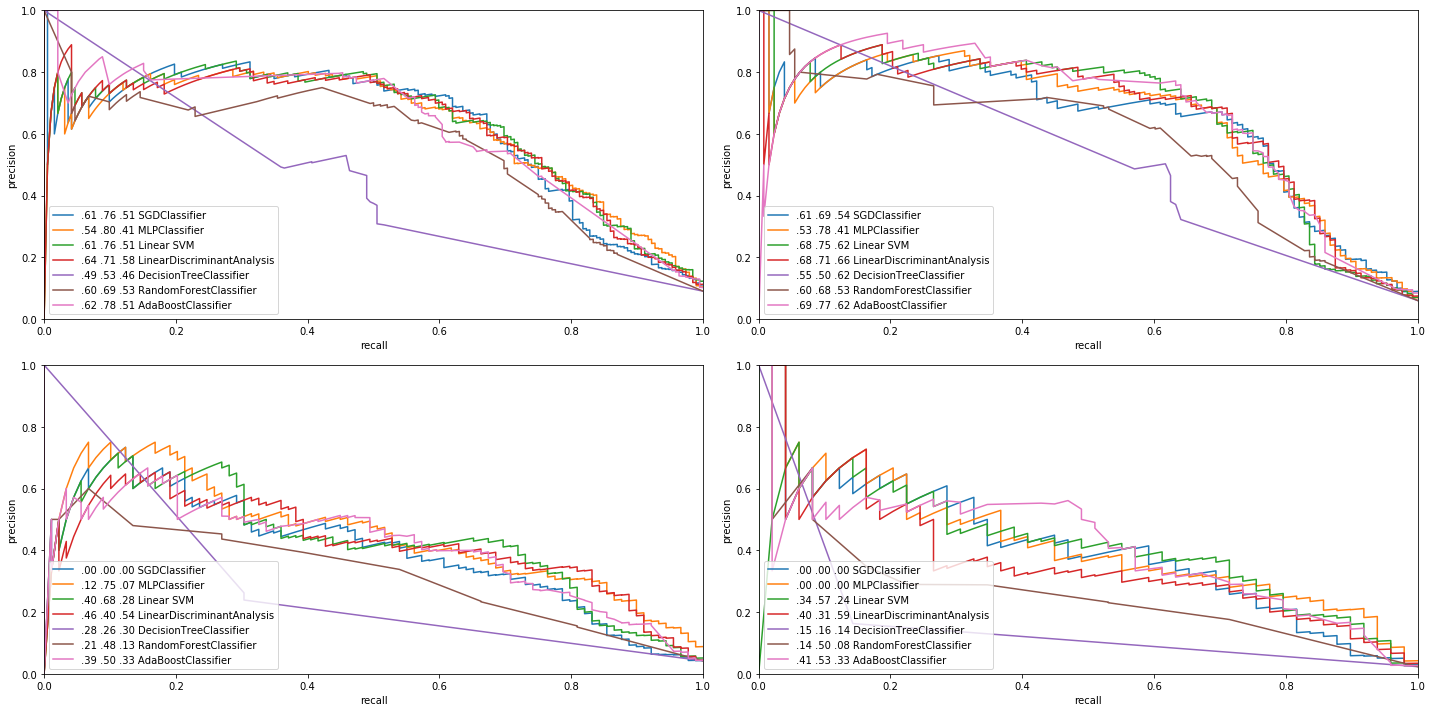

In [6]:
import classify
classify.run(['python', 'android', 'html', 'sql'])

In [ ]:
list bad algos. reasons.

# Clustering

In [7]:
%%latex
$$c = \sqrt{a^2 + b^2}$$

<IPython.core.display.Latex object>

## Decomposition
Load (X, Y, F) for 6 tags 'python',... and apply Classification Pipelines.
These samples are sorted by 

* X ∊ R<sup>(s❌wt)</sup><sub>tag</sub>
* Y ∊ B(s)
* F ∊ R(s❌wt)

Plot rrecision recall for each tag❌algo.


FloatProgress(value=10.0)

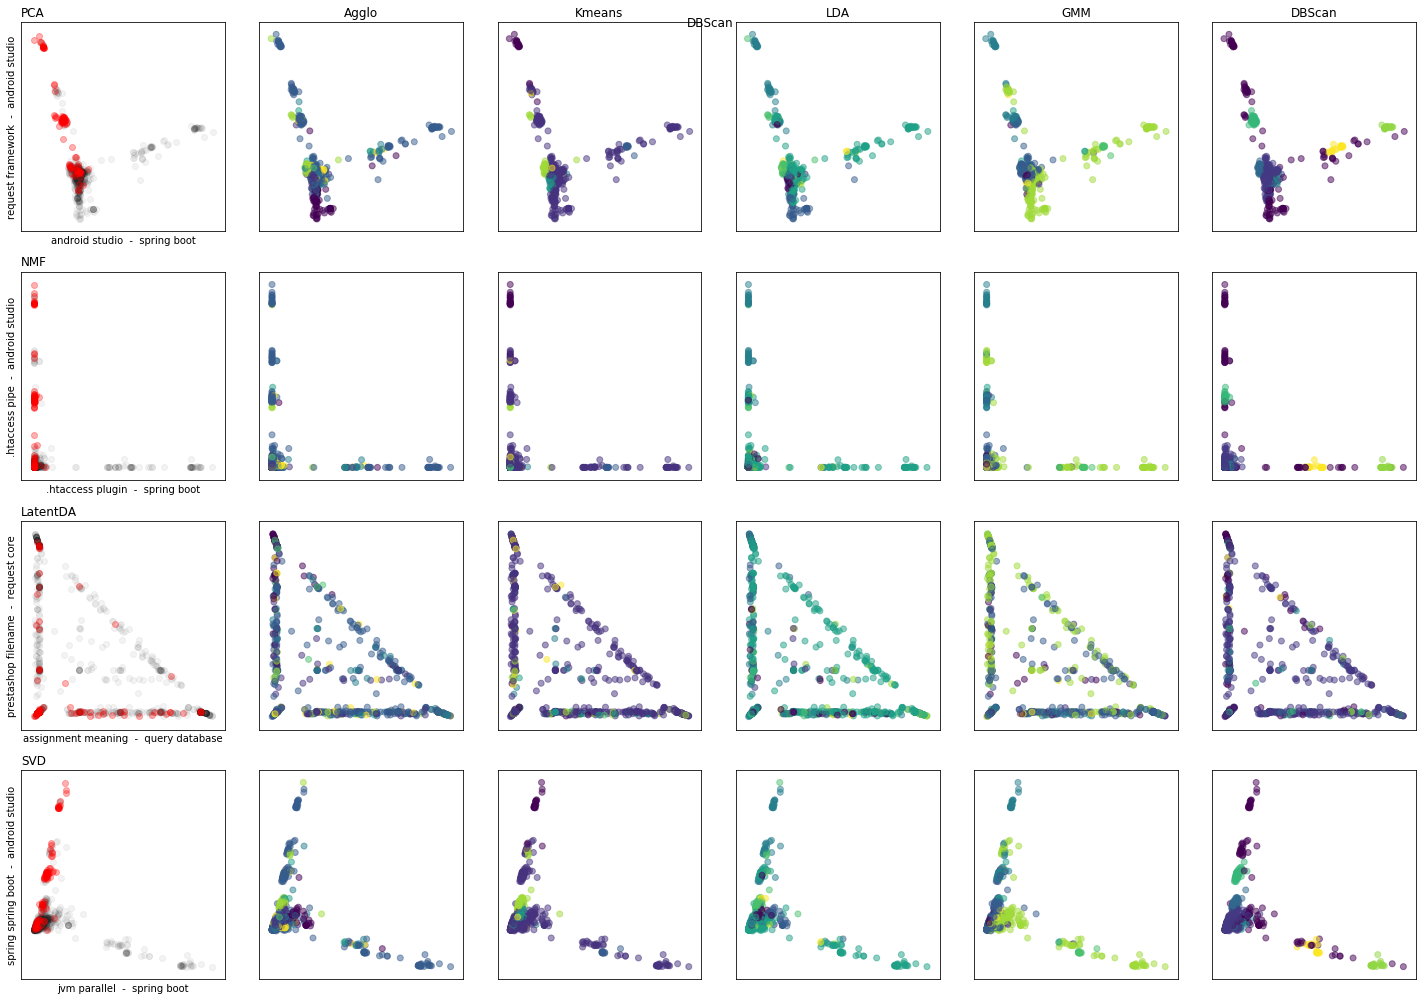

In [12]:
import cluster
cluster.run('android')

In [ ]:
find best matching cluster (maybe vary cluster count)

# Hierarchical Clustering

In [ ]:
import hierarchy

In [7]:
%%HTML
<iframe width="100%" height="600" frameBorder="0" src="http://localhost:3000/"></frame>

# Install

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
#!gulp

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')